# House Prices - Advanced Regression Techniques

#### 20213013 컴퓨터공학과 김어진

## 데이터 로드

In [2]:
import pandas as pd

# 'train.csv'와 'test.csv' 파일 경로 설정
train_file_path = r"C:\Users\chosun\Downloads\house-prices-advanced-regression-techniques\train.csv"
test_file_path = r"C:\Users\chosun\Downloads\house-prices-advanced-regression-techniques\test.csv"   # test.csv 파일 경로

# 1. train.csv 데이터 로드
train_df = pd.read_csv(train_file_path)

# 2. test.csv 데이터 로드
test_df = pd.read_csv(test_file_path)

# 3. 데이터프레임 첫 몇 줄 확인
print("Train DataFrame - First 5 rows:")
print(train_df.head())  # train 데이터프레임의 첫 5줄 출력

print("\nTest DataFrame - First 5 rows:")
print(test_df.head())   # test 데이터프레임의 첫 5줄 출력


Train DataFrame - First 5 rows:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  S

## 데이터 정규화

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# 연속형 수치 데이터 목록
continuous_features = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 
                       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
                       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
                       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

# 범주형 데이터 목록
categorical_features = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 
                        'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
                        'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
                        'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType', 
                        'SaleType', 'SaleCondition']

# 순서형 데이터 목록
ordinal_features = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 
                    'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 
                    'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 
                    'PoolQC', 'Fence']

# 1. 결측치 처리
imputer = SimpleImputer(strategy='mean')
train_df[continuous_features] = imputer.fit_transform(train_df[continuous_features])
test_df[continuous_features] = imputer.transform(test_df[continuous_features])

# 2. 연속형 수치 데이터 정규화
scaler = StandardScaler()
train_df[continuous_features] = scaler.fit_transform(train_df[continuous_features])
test_df[continuous_features] = scaler.transform(test_df[continuous_features])

# 3. 범주형 데이터 원-핫 인코딩
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
train_encoded = encoder.fit_transform(train_df[categorical_features])
test_encoded = encoder.transform(test_df[categorical_features])

# 원-핫 인코딩된 열 이름 생성
encoded_feature_names = encoder.get_feature_names_out(categorical_features)

# 원-핫 인코딩된 데이터를 데이터프레임에 추가
train_df = pd.concat([
    train_df.drop(columns=categorical_features),  # 원래 범주형 열은 제거하고
    pd.DataFrame(train_encoded, columns=encoded_feature_names)  # 인코딩된 열 추가
], axis=1)

test_df = pd.concat([
    test_df.drop(columns=categorical_features),  # 원래 범주형 열은 제거하고
    pd.DataFrame(test_encoded, columns=encoded_feature_names)  # 인코딩된 열 추가
], axis=1)

# 4. 순서형 데이터 매핑
ordinal_mapping = {
    'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0,
    'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0,
    'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0,
    'Y': 3, 'Av': 2, 'Mn': 1, 'No': 0, 'NA': 0,
    'Gtl': 3, 'Mod': 2, 'Sev': 1
}

for feature in ordinal_features:
    train_df[feature] = train_df[feature].map(ordinal_mapping)
    test_df[feature] = test_df[feature].map(ordinal_mapping)

# 5. 이진 데이터 처리
train_df['CentralAir'] = (train_df['CentralAir'] == 'Y').astype(int)
test_df['CentralAir'] = (test_df['CentralAir'] == 'Y').astype(int)

# 6. 날짜 관련 데이터 처리
current_year = 2024
for year_feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    train_df[f'{year_feature}_age'] = current_year - train_df[year_feature]
    test_df[f'{year_feature}_age'] = current_year - test_df[year_feature]

# 월 데이터 순환 인코딩
train_df['MoSold_sin'] = np.sin(2 * np.pi * train_df['MoSold'] / 12)
train_df['MoSold_cos'] = np.cos(2 * np.pi * train_df['MoSold'] / 12)
test_df['MoSold_sin'] = np.sin(2 * np.pi * test_df['MoSold'] / 12)
test_df['MoSold_cos'] = np.cos(2 * np.pi * test_df['MoSold'] / 12)

# 7. 타겟 변수 로그 변환 (train 데이터셋에만 적용)
train_df['SalePrice_log'] = np.log1p(train_df['SalePrice'])

# 정규화된 데이터 확인
print("Normalized Train DataFrame - First 5 rows:")
print(train_df.head())

print("\nNormalized Test DataFrame - First 5 rows:")
print(test_df.head())

Normalized Train DataFrame - First 5 rows:
   Id  MSSubClass  LotFrontage   LotArea LandSlope  OverallQual  OverallCond  \
0   1          60    -0.229372 -0.207142       Gtl          NaN          NaN   
1   2          20     0.451936 -0.091886       Gtl          NaN          NaN   
2   3          60    -0.093110  0.073480       Gtl          NaN          NaN   
3   4          70    -0.456474 -0.096897       Gtl          NaN          NaN   
4   5          60     0.633618  0.375148       Gtl          NaN          NaN   

   YearBuilt  YearRemodAdd  MasVnrArea  ...  SaleCondition_Alloca  \
0       2003          2003    0.511418  ...                   0.0   
1       1976          1976   -0.574410  ...                   0.0   
2       2001          2002    0.323060  ...                   0.0   
3       1915          1970   -0.574410  ...                   0.0   
4       2000          2000    1.364570  ...                   0.0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_

In [4]:
# 특성 중요도 확인
from sklearn.ensemble import RandomForestRegressor

# 타겟 변수와 불필요한 컬럼 제외
X = train_df.drop(['SalePrice', 'SalePrice_log', 'Id'], axis=1, errors='ignore')

# 문자열 데이터가 있는지 확인
categorical_columns = X.select_dtypes(include=['object']).columns
if len(categorical_columns) > 0:
    print("아직 변환이 필요한 범주형 컬럼:", categorical_columns)
    # 남은 범주형 변수들에 대해 Label 인코딩 수행
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    for col in categorical_columns:
        X[col] = le.fit_transform(X[col].astype(str))

y = train_df['SalePrice_log']

# Random Forest 모델 학습
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# 특성 중요도 출력
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print(feature_importance.head(10))  # 상위 10개 특성 출력

아직 변환이 필요한 범주형 컬럼: Index(['LandSlope', 'Functional', 'PavedDrive', 'MiscFeature'], dtype='object')
           feature  importance
9        ExterQual    0.342699
25       GrLivArea    0.189639
39      GarageCars    0.065963
19     TotalBsmtSF    0.050979
40      GarageArea    0.031002
22        1stFlrSF    0.029826
225  YearBuilt_age    0.029276
32     KitchenQual    0.027028
21      CentralAir    0.022768
15      BsmtFinSF1    0.019669


In [6]:
# 다중 공신성 확인

from statsmodels.stats.outliers_influence import variance_inflation_factor # type: ignore

def calculate_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

# Before calculating VIF, clean the data
X = X.replace([np.inf, -np.inf], np.nan)  # Replace infinities with NaN
X = X.dropna(axis=1)  # Drop columns with NaN values

# Now calculate VIF
vif_data = calculate_vif(X)
print(vif_data.sort_values('VIF', ascending=False).head(10))

vif_data = calculate_vif(X)
print(vif_data.sort_values('VIF', ascending=False).head(10))  # VIF가 높은 상위 10개 특성 출력

c:\Users\chosun\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


             variables  VIF
107    Condition2_RRAn  inf
114  HouseStyle_1.5Fin  inf
116  HouseStyle_1Story  inf
117  HouseStyle_2.5Fin  inf
118  HouseStyle_2.5Unf  inf
119  HouseStyle_2Story  inf
120  HouseStyle_SFoyer  inf
121    HouseStyle_SLvl  inf
122     RoofStyle_Flat  inf
123    RoofStyle_Gable  inf


c:\Users\chosun\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


             variables  VIF
107    Condition2_RRAn  inf
114  HouseStyle_1.5Fin  inf
116  HouseStyle_1Story  inf
117  HouseStyle_2.5Fin  inf
118  HouseStyle_2.5Unf  inf
119  HouseStyle_2Story  inf
120  HouseStyle_SFoyer  inf
121    HouseStyle_SLvl  inf
122     RoofStyle_Flat  inf
123    RoofStyle_Gable  inf


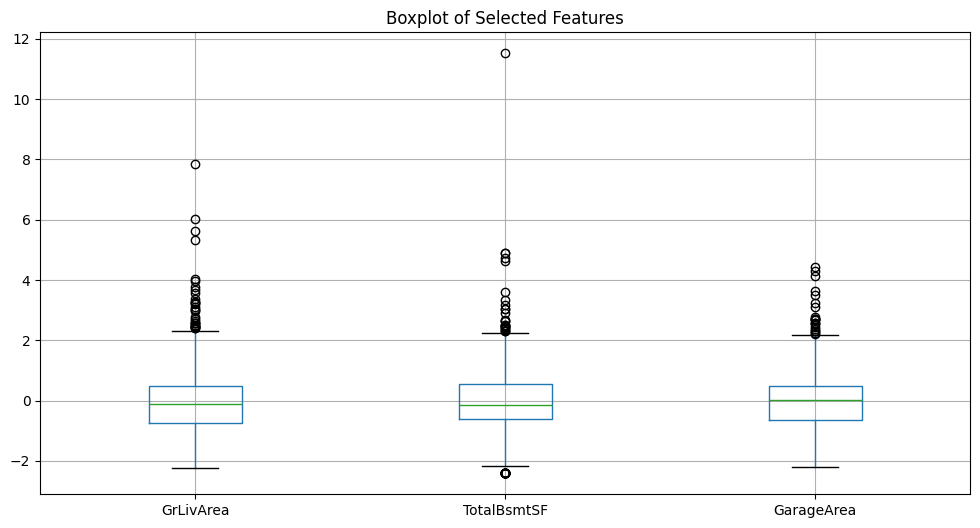

In [8]:
# 이상치 확인
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
train_df.boxplot(column=['GrLivArea', 'TotalBsmtSF', 'GarageArea'])
plt.title('Boxplot of Selected Features')
plt.show()

In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# 데이터 로드 (예시)
# train_df = pd.read_csv('train.csv') # 실제 데이터 파일 로드

# 연속형 및 범주형 특성 정의
continuous_features = ['GrLivArea', 'TotalBsmtSF', 'LotArea', 'GarageArea', '1stFlrSF', 'YearBuilt', 'YearRemodAdd']
categorical_features = ['ExterQual', 'BsmtQual', 'KitchenQual']

# 결측치 처리
imputer = SimpleImputer(strategy='median')
train_df[continuous_features] = imputer.fit_transform(train_df[continuous_features])

# 연속형 특성 정규화
scaler = StandardScaler()
train_df[continuous_features] = scaler.fit_transform(train_df[continuous_features])

# 범주형 특성 원-핫 인코딩
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
train_encoded = encoder.fit_transform(train_df[categorical_features])

# 원-핫 인코딩된 열 이름 생성
encoded_feature_names = encoder.get_feature_names_out(categorical_features)

# 원-핫 인코딩된 데이터를 데이터프레임에 추가
train_df_encoded = pd.concat([
    train_df[continuous_features],
    pd.DataFrame(train_encoded, columns=encoded_feature_names)
], axis=1)

# 타겟 변수 로그 변환 (train 데이터셋에만 적용)
if 'SalePrice' in train_df.columns:
    train_df_encoded['SalePrice_log'] = np.log1p(train_df['SalePrice'])  # SalePrice를 로그 변환하여 SalePrice_log 생성
else:
    print("Error: 'SalePrice' column not found in the training DataFrame.")

# 최종 특성 목록 확인
final_features = list(train_df_encoded.columns)
print("\n최종 사용 특성 목록:")
print(final_features)


최종 사용 특성 목록:
['GrLivArea', 'TotalBsmtSF', 'LotArea', 'GarageArea', '1stFlrSF', 'YearBuilt', 'YearRemodAdd', 'ExterQual_2', 'ExterQual_3', 'ExterQual_4', 'ExterQual_5', 'BsmtQual_2.0', 'BsmtQual_3.0', 'BsmtQual_4.0', 'BsmtQual_5.0', 'BsmtQual_nan', 'KitchenQual_2', 'KitchenQual_3', 'KitchenQual_4', 'KitchenQual_5', 'SalePrice_log']


In [30]:
print(train_df_encoded.head())
print(train_df_encoded.columns)

   GrLivArea  TotalBsmtSF   LotArea  GarageArea  1stFlrSF  YearBuilt  \
0   0.370333    -0.459303 -0.207142    0.351000 -0.793434   1.050994   
1  -0.482512     0.466465 -0.091886   -0.060731  0.257140   0.156734   
2   0.515013    -0.313369  0.073480    0.631726 -0.627826   0.984752   
3   0.383659    -0.687324 -0.096897    0.790804 -0.521734  -1.863632   
4   1.299326     0.199680  0.375148    1.698485 -0.045611   0.951632   

   YearRemodAdd  ExterQual_2  ExterQual_3  ExterQual_4  ...  BsmtQual_2.0  \
0      0.878668          0.0          0.0          1.0  ...           0.0   
1     -0.429577          0.0          1.0          0.0  ...           0.0   
2      0.830215          0.0          0.0          1.0  ...           0.0   
3     -0.720298          0.0          1.0          0.0  ...           0.0   
4      0.733308          0.0          0.0          1.0  ...           0.0   

   BsmtQual_3.0  BsmtQual_4.0  BsmtQual_5.0  BsmtQual_nan  KitchenQual_2  \
0           0.0           1.

In [ ]:
'''

최종 사용 특성 목록:
['GrLivArea', 'TotalBsmtSF', 'LotArea', 'GarageArea', '1stFlrSF', 'YearBuilt', 'YearRemodAdd', 'ExterQual_2', 'ExterQual_3', 'ExterQual_4', 'ExterQual_5', 'BsmtQual_2.0', 'BsmtQual_3.0', 'BsmtQual_4.0', 'BsmtQual_5.0', 'BsmtQual_nan', 'KitchenQual_2', 'KitchenQual_3', 'KitchenQual_4', 'KitchenQual_5', 'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev', 'Functional_Maj1', 'Functional_Maj2', 'Functional_Min1', 'Functional_Min2', 'Functional_Mod', 'Functional_Sev', 'Functional_Typ', 'PavedDrive_N', 'PavedDrive_P', 'PavedDrive_Y', 'MiscFeature_Gar2', 'MiscFeature_Othr', 'MiscFeature_Shed', 'MiscFeature_TenC', 'MiscFeature_nan', 'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev', 'Functional_Maj1', 'Functional_Maj2', 'Functional_Min1', 'Functional_Min2', 'Functional_Mod', 'Functional_Sev', 'Functional_Typ', 'PavedDrive_N', 'PavedDrive_P', 'PavedDrive_Y', 'MiscFeature_Gar2', 'MiscFeature_Othr', 'MiscFeature_Shed', 'MiscFeature_TenC', 'MiscFeature_nan']

Normalized Train DataFrame - First 5 rows:
   GrLivArea  TotalBsmtSF   LotArea  GarageArea  1stFlrSF  YearBuilt  \
0   0.370333    -0.459303 -0.207142    0.351000 -0.793434   1.050994   
1  -0.482512     0.466465 -0.091886   -0.060731  0.257140   0.156734   
2   0.515013    -0.313369  0.073480    0.631726 -0.627826   0.984752   
3   0.383659    -0.687324 -0.096897    0.790804 -0.521734  -1.863632   
4   1.299326     0.199680  0.375148    1.698485 -0.045611   0.951632   

   YearRemodAdd  ExterQual_2  ExterQual_3  ExterQual_4  ...  Functional_Sev  \
0      0.878668          0.0          0.0          1.0  ...             0.0   
1     -0.429577          0.0          1.0          0.0  ...             0.0   
2      0.830215          0.0          0.0          1.0  ...             0.0   
3     -0.720298          0.0          1.0          0.0  ...             0.0   
4      0.733308          0.0          0.0          1.0  ...             0.0   

   Functional_Typ  PavedDrive_N  PavedDrive_P  PavedDrive_Y  MiscFeature_Gar2  \
0             1.0           0.0           0.0           1.0               0.0   
1             1.0           0.0           0.0           1.0               0.0   
2             1.0           0.0           0.0           1.0               0.0   
3             1.0           0.0           0.0           1.0               0.0   
4             1.0           0.0           0.0           1.0               0.0   

   MiscFeature_Othr  MiscFeature_Shed  MiscFeature_TenC  MiscFeature_nan  
0               0.0               0.0               0.0              1.0  
1               0.0               0.0               0.0              1.0  
2               0.0               0.0               0.0              1.0  
3               0.0               0.0               0.0              1.0  
4               0.0               0.0               0.0              1.0  

[5 rows x 56 columns]

Normalized Test DataFrame - First 5 rows:
   GrLivArea  TotalBsmtSF   LotArea  GarageArea  1stFlrSF  YearBuilt  \
0  -1.179256    -0.400017  0.110763    1.202536 -0.689929  -0.340077   
1  -0.354966     0.619239  0.375850   -0.753188  0.430511  -0.439440   
2   0.216136    -0.295127  0.332053    0.042202 -0.607125   0.852269   
3   0.168544    -0.299687 -0.054002   -0.013943 -0.612300   0.885390   
4  -0.448246     0.507509 -0.552407    0.154492  0.303718   0.686666   

   YearRemodAdd  ExterQual_2  ExterQual_3  ExterQual_4  ...  Functional_Sev  \
0     -1.156380          0.0          1.0          0.0  ...             0.0   
1     -1.301740          0.0          1.0          0.0  ...             0.0   
2      0.636400          0.0          1.0          0.0  ...             0.0   
3      0.636400          0.0          1.0          0.0  ...             0.0   
4      0.345679          0.0          0.0          1.0  ...             0.0   

   Functional_Typ  PavedDrive_N  PavedDrive_P  PavedDrive_Y  MiscFeature_Gar2  \
0             1.0           0.0           0.0           1.0               0.0   
1             1.0           0.0           0.0           1.0               1.0   
2             1.0           0.0           0.0           1.0               0.0   
3             1.0           0.0           0.0           1.0               0.0   
4             1.0           0.0           0.0           1.0               0.0   

   MiscFeature_Othr  MiscFeature_Shed  MiscFeature_TenC  MiscFeature_nan  
0               0.0               0.0               0.0              1.0  
1               0.0               0.0               0.0              0.0  
2               0.0               0.0               0.0              1.0  
3               0.0               0.0               0.0              1.0  
4               0.0               0.0               0.0              1.0  

[5 rows x 56 columns]



-------------------------------------------------------------------------------------------------------------------------------------------------------------
최종 사용 특성 목록:
연속형 특성 7개: GrLivArea, TotalBsmtSF, LotArea, GarageArea, 1stFlrSF, YearBuilt, YearRemodAdd
범주형 특성(원-핫 인코딩 적용): ExterQual, BsmtQual, KitchenQual, LandSlope, Functional, PavedDrive, MiscFeature
데이터 정규화:
연속형 특성들은 표준화(평균 0, 표준편차 1)되었습니다.
범주형 특성들은 원-핫 인코딩되었습니다.
처리된 데이터 형태:
훈련 데이터와 테스트 데이터 모두 56개의 열을 가지고 있습니다.
각 행은 하나의 주택을 나타내며, 각 열은 해당 특성을 나타냅니다.

'''

## 선형회귀 모델

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 데이터 분할
X = train_df_processed.drop('SalePrice_log', axis=1)
y = train_df_processed['SalePrice_log']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 검증 세트에 대한 예측
y_pred = model.predict(X_val)

# 모델 평가
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")

# 특성 중요도 확인
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': np.abs(model.coef_)})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nTop 10 Important Features:")
print(feature_importance.head(10))

# 테스트 세트에 대한 예측
test_predictions = model.predict(test_df_processed)

# 예측 결과를 원래 스케일로 변환 (지수 변환)
test_predictions_original = np.exp(test_predictions) - 1


RMSE: 0.1804
R2 Score: 0.8256

Top 10 Important Features:
          feature  importance
15   BsmtQual_nan    0.250667
14   BsmtQual_5.0    0.175759
7     ExterQual_2    0.165535
0       GrLivArea    0.139757
19  KitchenQual_5    0.132572
16  KitchenQual_2    0.102925
10    ExterQual_5    0.084292
13   BsmtQual_4.0    0.080238
5       YearBuilt    0.070768
9     ExterQual_4    0.067215


## 활성화 함수(ReLU)

In [32]:
import torch

class ReLU(torch.nn.Module):
    def __init__(self):
        super(ReLU, self).__init__()
    
    def forward(self, x):
        return torch.max(torch.zeros_like(x), x)

## MLP 모델

In [36]:
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim1=128, hidden_dim2=64, output_dim=1):  # 뉴런 수 조정
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, output_dim)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

## 모델 훈련

In [54]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 데이터 확인
print(train_df_encoded.head())  # 데이터프레임의 첫 5행 확인
print(train_df_encoded.columns)  # 열 이름 확인

# 데이터를 PyTorch 텐서로 변환
X = train_df_encoded.drop('SalePrice_log', axis=1).values
y = train_df_encoded['SalePrice_log'].values

# 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터를 PyTorch 텐서로 변환
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train).view(-1, 1)
X_val_tensor = torch.FloatTensor(X_val)
y_val_tensor = torch.FloatTensor(y_val).view(-1, 1)

# 모델 초기화
input_dim = X_train.shape[1]
model = MLP(input_dim)

# 손실 함수와 옵티마이저 정의
criterion = nn.MSELoss()  # MSE 손실 함수 사용
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 손실 값을 저장할 리스트
train_losses = []
val_losses = []

# 학습 루프
num_epochs = 2000
for epoch in range(num_epochs):
    model.train()
    
    # 순전파
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # 역전파 및 가중치 업데이트
    loss.backward()
    optimizer.step()
    
    # 손실 기록
    train_losses.append(loss.item())
    
    # 검증 손실 계산
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
        val_losses.append(val_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')


   GrLivArea  TotalBsmtSF   LotArea  GarageArea  1stFlrSF  YearBuilt  \
0   0.370333    -0.459303 -0.207142    0.351000 -0.793434   1.050994   
1  -0.482512     0.466465 -0.091886   -0.060731  0.257140   0.156734   
2   0.515013    -0.313369  0.073480    0.631726 -0.627826   0.984752   
3   0.383659    -0.687324 -0.096897    0.790804 -0.521734  -1.863632   
4   1.299326     0.199680  0.375148    1.698485 -0.045611   0.951632   

   YearRemodAdd  ExterQual_2  ExterQual_3  ExterQual_4  ...  BsmtQual_2.0  \
0      0.878668          0.0          0.0          1.0  ...           0.0   
1     -0.429577          0.0          1.0          0.0  ...           0.0   
2      0.830215          0.0          0.0          1.0  ...           0.0   
3     -0.720298          0.0          1.0          0.0  ...           0.0   
4      0.733308          0.0          0.0          1.0  ...           0.0   

   BsmtQual_3.0  BsmtQual_4.0  BsmtQual_5.0  BsmtQual_nan  KitchenQual_2  \
0           0.0           1.

## 평가 및 예측

In [55]:
from sklearn.metrics import mean_squared_error, r2_score

# 검증 데이터에 대한 예측
model.eval()
with torch.no_grad():
    val_predictions = model(X_val_tensor)
    val_predictions = val_predictions.numpy()  # 텐서를 넘파이 배열로 변환

# RMSE와 R² 점수 계산
rmse = mean_squared_error(y_val_tensor.numpy(), val_predictions, squared=False)
r2 = r2_score(y_val_tensor.numpy(), val_predictions)

print(f'RMSE: {rmse:.4f}, R²: {r2:.4f}')

RMSE: 0.2332, R²: 0.7086


c:\Users\chosun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## 결과

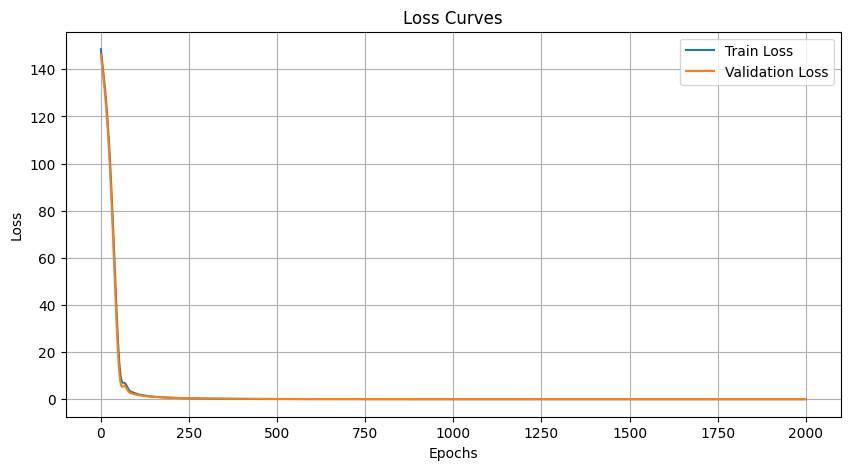

Final Validation Loss: 0.0544


In [56]:

# 손실 그래프 시각화
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# 최종 검증 손실 출력
print(f'Final Validation Loss: {val_losses[-1]:.4f}')

In [57]:
# 테스트 데이터에 대한 예측
X_test_tensor = torch.FloatTensor(test_df_encoded.values)

with torch.no_grad():
    test_predictions = model(X_test_tensor)

# 예측 결과를 원래 스케일로 변환 (지수 변환)
test_predictions_original = np.expm1(test_predictions.numpy())  # expm1은 exp(x) - 1을 계산합니다.

# 결과 저장
submission = pd.DataFrame({
    'Id': test_df['Id'],  # 테스트 데이터의 Id 열 사용
    'SalePrice': test_predictions_original.flatten()  # 예측 결과
})

# 결과를 CSV 파일로 저장
submission.to_csv('submission.csv', index=False)
print("Submission file has been created as 'submission.csv'.")

Submission file has been created as 'submission.csv'.
